In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
audi_cars = pd.read_csv("data/audi_cars_data.csv")
list(audi_cars.columns)
audi_cars.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
0,5900.0,Used,Audi,100,2.0 E,C4 (1991-1994),1992,262000.0,101.0,1984.0,Gasoline
1,6900.0,Used,Audi,100,Avant 2.8 E,C4 (1991-1994),1991,332000.0,174.0,2771.0,Gasoline + LPG
2,5000.0,Used,Audi,100,Avant 2.6 E,C4 (1991-1994),1993,500000.0,150.0,2598.0,Gasoline
3,19900.0,Used,Audi,100,NaN,C1 (1968-1976),1974,99000.0,115.0,1900.0,Gasoline
4,14999.0,Used,Audi,100,Avant 2.2,C3 (1982-1991),1987,108729.0,137.0,2226.0,Gasoline


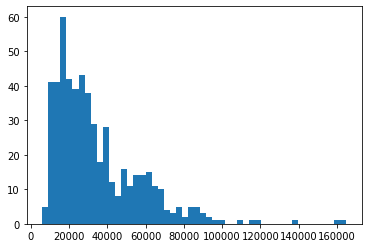

In [4]:
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()
np.std(audi_a3_2000ccm["Price"])
plt.figure()
plt.hist(audi_a3_2000ccm["Price"], bins = 50)
plt.show()

In [5]:
import pandas as pd
import cmdstanpy


model = cmdstanpy.CmdStanModel(stan_file='car_price_1_ppc.stan')

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:

N = 532
data = {'N': N,
        'x1_new': np.array([np.random.normal(200000, 70000) for _ in range(N)]),
        'x2_new': np.array([np.random.normal(2009, 4) for _ in range(N)])
        }
sim=model.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [7]:
sim_pd = sim.draws_pd()
prices_sim_pd = sim_pd.loc[:, 'y_generated[1]':'y_generated[523]'].values
sim_pd.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,15.0550,0.931565,0.503905,3.0,7.0,0.0,-10.35550,35154.8,-0.163301,19.0723,...,37096.4,52901.0,32600.3,49592.1,59272.4,20386.9,51811.8,50734.6,46645.0,38074.0
1,15.0550,0.197747,0.503905,2.0,3.0,0.0,-10.29130,35154.8,-0.163301,19.0723,...,37096.4,52901.3,32597.6,49593.1,59273.2,20387.5,51812.2,50732.8,46648.2,38073.4
2,10.7061,0.828559,0.503905,2.0,7.0,0.0,-9.56115,33935.7,-0.117395,17.4487,...,42824.8,54196.9,39602.9,51829.2,58778.0,30845.2,53427.4,52646.0,49727.6,43542.8
3,11.5865,0.995250,0.503905,3.0,7.0,0.0,-8.58042,37426.3,-0.192459,22.2112,...,39180.6,57806.9,33880.5,53905.9,65314.8,19485.4,56522.1,55251.1,50432.4,40328.6
4,13.8296,0.985121,0.503905,3.0,7.0,0.0,-10.07230,34482.0,-0.181735,24.6385,...,43485.8,61081.6,38491.8,57413.4,68173.9,24920.8,59882.8,58676.4,54147.3,44584.8


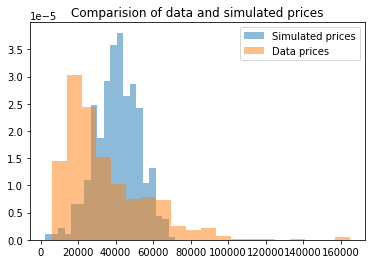

In [8]:
plt.figure()

plt.hist(prices_sim_pd[0], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [9]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1': audi_a3_2000ccm['Mileage_km'].values,
    'x2': audi_a3_2000ccm['Production_year'].values,
    'y': audi_a3_2000ccm['Price'].values
}

model_fit = cmdstanpy.CmdStanModel(stan_file='car_price_1_fit.stan')
fit = model_fit.sample(data=data, chains=4, iter_warmup=1000, iter_sampling=2000)


INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_1_fit.stan to exe file /home/DA/project/car_price_1_fit
INFO:cmdstanpy:compiled model executable: /home/DA/project/car_price_1_fit
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  200 / 3000 [  6%]  (Warmup)


chain 1 |█▌        | 00:01 Iteration:  300 / 3000 [ 10%]  (Warmup)








chain 1 |█▉        | 00:03 Iteration:  400 / 3000 [ 13%]  (Warmup)
chain 1 |██▏       | 00:03 Iteration:  500 / 3000 [ 16%]  (Warmup)
chain 1 |██▌       | 00:04 Iteration:  600 / 3000 [ 20%]  (Warmup)

chain 1 |██▊       | 00:04 Iteration:  700 / 3000 [ 23%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  800 / 3000 [ 26%]  (Warmup)









chain 1 |███▍      | 00:06 Iteration:  900 / 3000 [ 30%]  (Warmup)








































chain 1 |████      | 00:09 Iteration: 1001 / 3000 [ 33%]  (Sampl


INFO:cmdstanpy:CmdStan done processing.


In [10]:
fit_pd = fit.draws_pd()
fit_pd

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,-41417.2,0.909859,0.000772,10.0,1023.0,0.0,41418.7,33240.1,-0.219239,22.5069,...,35639.2,51528.0,52337.8,36974.7,45942.0,29154.4,45916.2,67097.0,39686.8,44525.7
1,-41417.5,0.881715,0.000772,10.0,1023.0,0.0,41419.1,31867.0,-0.218434,23.0785,...,35839.3,51037.6,51659.1,36719.6,44806.8,28079.0,39973.5,69980.4,36088.5,43738.6
2,-41419.6,0.999800,0.000772,10.0,1023.0,0.0,41420.9,32168.6,-0.221366,23.2685,...,33603.2,54056.0,51596.0,39126.9,42639.7,27663.7,46786.1,69003.5,40570.8,44226.8
3,-41419.8,0.874299,0.000772,10.0,1023.0,0.0,41421.8,31410.6,-0.219475,23.3844,...,34815.5,52558.2,51459.4,39465.2,43776.0,27172.1,43015.1,70100.6,39070.7,40673.2
4,-41420.1,0.781025,0.000772,8.0,419.0,0.0,41423.7,32014.4,-0.220423,23.1731,...,34147.3,49695.3,54455.9,38218.3,41993.6,25674.7,42733.5,69527.5,36466.5,47129.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-41418.6,0.996332,0.059925,5.0,31.0,0.0,41420.4,34001.4,-0.218555,22.0837,...,33430.6,54776.7,51863.3,39028.8,46789.8,28751.8,44654.4,66117.1,38100.9,48181.4
7996,-41419.1,0.981672,0.059925,6.0,79.0,0.0,41420.3,30770.0,-0.218974,23.6718,...,35137.7,51048.5,52055.8,35201.7,51189.7,26597.9,43143.2,68727.3,40850.6,42488.6
7997,-41420.1,0.979163,0.059925,3.0,15.0,0.0,41420.6,30708.0,-0.219196,23.7174,...,35637.8,54011.6,52860.6,35694.5,46309.4,21335.4,42460.3,64955.8,39818.9,42983.2
7998,-41418.9,0.996980,0.059925,6.0,95.0,0.0,41420.9,33858.3,-0.218791,22.1014,...,35775.1,54071.9,47863.4,37132.6,46176.6,24755.7,46772.5,68007.5,39678.4,40382.3


In [11]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

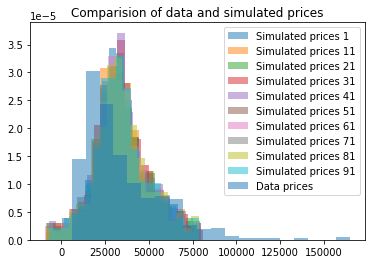

In [12]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[i], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [38]:
model = cmdstanpy.CmdStanModel(stan_file='car_price_2_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_2_ppc.stan to exe file /home/DA/project/car_price_2_ppc
INFO:cmdstanpy:compiled model executable: /home/DA/project/car_price_2_ppc


In [39]:
N = 532
data = {'N': N,
        'mileage': np.array([np.random.normal(200000, 70000) for _ in range(N)]),
        'production_year': np.array([np.random.normal(2009, 4) for _ in range(N)])
        }
sim=model.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)

chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)





chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)
















chain 1 |██████████| 00:12 Sampling completed                       
chain 2 |██████████| 00:12 Sampling completed                       
chain 3 |██████████| 00:12 Sampling completed                       
chain 4 |██████████| 00:12 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [40]:
sim_pd = sim.draws_pd()
prices_sim_pd = sim_pd.loc[:, 'price_samples[1]':'price_samples[523]'].values
sim_pd.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,c1,c2,a,...,price_samples[523],price_samples[524],price_samples[525],price_samples[526],price_samples[527],price_samples[528],price_samples[529],price_samples[530],price_samples[531],price_samples[532]
0,-445638.0,0.50000,6.687730e-08,1.0,2.0,1.0,445638.0,-0.003666,0.712252,0.285295,...,0.010665,0.119783,0.183883,0.000038,0.012583,0.007536,3.325710e-02,0.040104,0.001815,0.033148
1,-445638.0,0.00000,6.687730e-08,0.0,1.0,1.0,445640.0,-0.003666,0.712252,0.285295,...,0.000013,0.012612,0.027569,0.292832,0.079903,0.036258,1.833480e-01,0.163282,0.001421,0.000291
2,-445638.0,0.50000,6.687730e-08,1.0,2.0,1.0,445640.0,-0.003666,0.712252,0.285295,...,0.008748,0.053133,0.005879,1.608510,0.062338,0.002390,8.819180e-01,0.019812,0.630931,0.036158
3,-445638.0,0.49012,6.687730e-08,2.0,4.0,1.0,445640.0,-0.003666,0.712252,0.285295,...,0.081083,0.220010,0.228760,0.024724,0.786227,0.074843,1.270100e-01,0.027394,0.051448,0.103564
4,-445638.0,0.51471,6.687730e-08,2.0,4.0,1.0,445638.0,-0.003666,0.712252,0.285295,...,0.001979,0.123225,0.024781,0.079337,0.337406,0.013098,6.887450e-07,0.084879,0.079367,0.616444


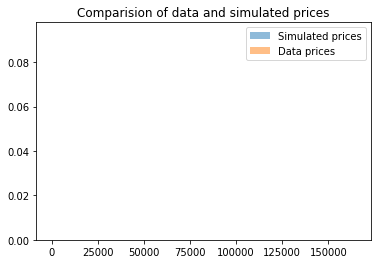

In [37]:
plt.figure()

plt.hist(prices_sim_pd[0], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()